# Convolutional Neural Network for Hand-written Digits Classifiaction



In [1]:
# Import MNIST data
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

## CNN Overview

![CNN](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/images/fig3.png)

## MNIST Dataset Overview

The MNIST handwritten digits dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. 

More info: http://yann.lecun.com/exdb/mnist/

In [2]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

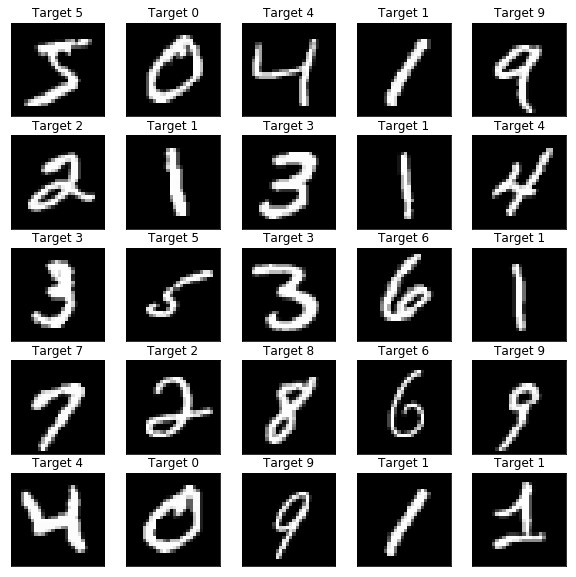

In [3]:
plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx+1)
    fig = plt.imshow(tf.squeeze(x_train[idx]), cmap='gray')
    plt.title('Target {}'.format(y_train[idx]))
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)

In [4]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=[28, 28, 1]),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                                    tf.keras.layers.Conv2D(64, kernel_size=(5, 5), activation='relu'),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                   ])

model.compile(optimizer='adam',
              batch_size=512,
              shuffle=True,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test,  y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 38s 635us/sample - loss: 0.2075 - accuracy: 0.9358
Epoch 2/5
60000/60000 [==============================] - 37s 617us/sample - loss: 0.0747 - accuracy: 0.9776
Epoch 3/5
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0566 - accuracy: 0.9829
Epoch 4/5
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0474 - accuracy: 0.9863
Epoch 5/5
60000/60000 [==============================] - 37s 618us/sample - loss: 0.0395 - accuracy: 0.9886
10000/1 - 2s - loss: 0.0193 - accuracy: 0.9934


[0.024285763513250277, 0.9934]

In [51]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_0 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
maxpool_0 (Dropout)          (None, 26, 26, 32)        0         
_________________________________________________________________
dropout_0 (MaxPooling2D)     (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
maxpool_1 (Dropout)          (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_1 (MaxPooling2D)     (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)             

In [71]:
model.layers[0]._name = 'conv2d_0'
model.layers[1]._name = 'maxpool_0'
model.layers[2]._name = 'dropout_0'
model.layers[3]._name = 'conv2d_1'
model.layers[4]._name = 'maxpool_1'
model.layers[5]._name = 'dropout_1'
model.layers[6]._name = 'flatten'
model.layers[7]._name = 'dense_0'
model.layers[8]._name = 'dense_1'

def visualize_conv_layer(layer_name, input_x, rows, layers, layer):
    layer_output=model.get_layer(layer_name).output
    intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output)
    intermediate_prediction=intermediate_model.predict(input_x.reshape(1,28,28,1))
    for idx in range(intermediate_prediction.shape[3]):
        plt.subplot(rows, cols, layer+idx*layers)
        fig = plt.imshow(intermediate_prediction[0, :, :, idx], cmap='gray')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        if idx == 0:
            plt.title(layer_name)

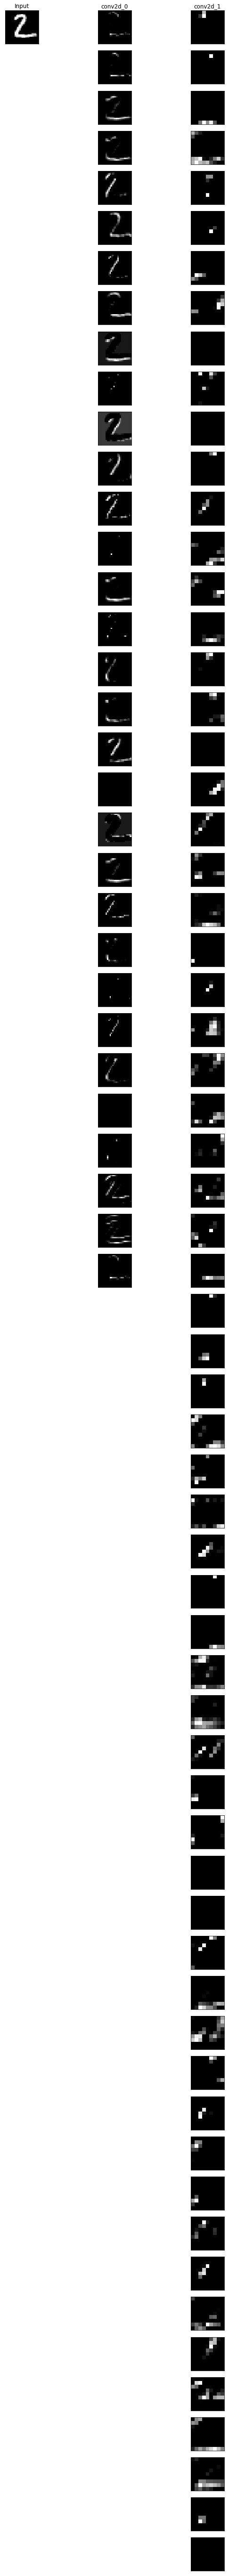

In [72]:
rows = 64
cols = 3
input_x = x_test[1]
plt.figure(figsize=(10,100))
plt.subplot(rows, cols, 1)
fig = plt.imshow(input_x[:, :, 0], cmap='gray')
plt.title('Input')
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
visualize_conv_layer('conv2d_0', input_x, 64, 3, 2)
visualize_conv_layer('conv2d_1', input_x, 64, 3, 3)